In [ ]:
#Install Required Libraries
# xarray numpy pandas matplotlib raseterio geopandas shapely scipy

Here we will first clean and combine the available netCDF files of Daily Gridded Rainfall Data (1950-2023) over India (25*25 km Resolution)

In [ ]:
#Import Libraries
import os # For working with files and directories
import xarray as xr # For handling NetCDF data
import numpy as np # For numerical operations
import pandas as pd # For tabular data processing
import matplotlib.pyplot as plt # For plotting

#Path to NetCDF files
data_dir = r"/Users/shariqkhan/Developer/College Projects/Analysis of Rainfall on Urban Clusters and its Impacts(India)/Work/Data/Rainfall Data /Original"
nc_files = sorted([f for f in os.listdir(data_dir) if f.endswith('.nc')])

# Create an empty list to store processed data
all_years_data = []

# Loop through all .nc files
for nc_file in nc_files:
    file_path = os.path.join(data_dir, nc_file)

# Open the dataset
ds = xr.open_dataset(file_path)

# Convert time variable
ds['TIME'] = pd.to_datetime(ds['TIME'].values)

# Extract year from filename
year = nc_file.split('.')[0] 

# Extract Monsoon Rainfall (June 1st – September 30th)
monsoon_rainfall = ds['RAINFALL'].sel(TIME=slice(f"{year}-06-01", f"{year}-09-30"))

# Replace missing values
monsoon_rainfall = monsoon_rainfall.where(monsoon_rainfall != -999, np.nan)

# Append processed data
all_years_data.append(monsoon_rainfall)

# Merge all years into one dataset
final_data = xr.concat(all_years_data, dim='TIME')

# Save cleaned data
# final_data.to_netcdf(r"/Users/shariqkhan/Developer/College Projects/Analysis of Rainfall on Urban Clusters and its Impacts(India)/Work/Data/Rainfall Data /Cleaned/cleaned_rainfall_data.nc")
# print("Cleaned data saved successfully!")

Cleaned data saved successfully!


Now we'll check the Metadata, Dimensions, Coordinates, Variables, CRS, Extent(Lat/Lon), Resolution, Missing Value Counts, Minimum Value, Maximum Value, Mean Value, Standard Deviation 

In [15]:
cleaned_data = r"/Users/shariqkhan/Developer/College Projects/Analysis of Rainfall on Urban Clusters and its Impacts(India)/Work/Data/Rainfall Data /Cleaned/cleaned_rainfall_data.nc"

# Open dataset
ds = xr.open_dataset(cleaned_data)

# Display metadata
print("METADATA:")
print(ds)

# Extract coordinate reference system (CRS) if available
crs = ds.attrs.get("crs", "Not Available")
print(f"CRS: {crs}")

# Get spatial extent (bounds)
lat_min, lat_max = ds["LATITUDE"].min().item(), ds["LATITUDE"].max().item()
lon_min, lon_max = ds["LONGITUDE"].min().item(), ds["LONGITUDE"].max().item()
print(f"SPATIAL EXTENT: Latitude: {lat_min} to {lat_max} Longitude: {lon_min} to {lon_max}")

# Calculate resolution
lat_res = np.abs(np.diff(ds["LATITUDE"]).mean().item())
lon_res = np.abs(np.diff(ds["LONGITUDE"]).mean().item())
print(f"Resolution (Pixel Size): {lat_res}° x {lon_res}°")

# Extract Rainfall data
rainfall = ds["RAINFALL"]

# Count missing values (-999 or NaN)
missing_values_count = np.isnan(rainfall).sum().item() + (rainfall == -999).sum().item()
print(f"Missing values count: {missing_values_count}")

# Data statistics
min_val = np.nanmin(rainfall).item()
max_val = np.nanmax(rainfall).item()
mean_val = np.nanmean(rainfall).item()
std_dev = np.nanstd(rainfall).item()
print("Data Stats:")
print(f"Min value: {min_val}")
print(f"Max value: {max_val}")
print(f"Mean value: {mean_val}")
print(f"Standard deviation: {std_dev}")

# Close dataset
ds.close()

METADATA:
<xarray.Dataset> Size: 17MB
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 122)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 1kB 66.5 66.75 67.0 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 1kB 6.5 6.75 7.0 7.25 ... 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 976B 2023-06-01 2023-06-02 ... 2023-09-30
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 17MB ...
CRS: Not Available
SPATIAL EXTENT: Latitude: 6.5 to 38.5 Longitude: 66.5 to 100.0
Resolution (Pixel Size): 0.25° x 0.25°
Missing values count: 1519022
Data Stats:
Min value: 0.0
Max value: 449.0838317871094
Mean value: 6.649726318647134
Standard deviation: 16.138028973917454


Now we'll check the Metadata, CRS, Extent(Lat/Lon), Resolution, Shape of the File, Missing Value Counts, Minimum Value, Maximum Value, Mean Value, Standard Deviation and Extreme Values

In [2]:
import rasterio
import numpy as np

# Path to the resampled population file
resampled_population_file = r"/Users/shariqkhan/Developer/College Projects/Analysis of Rainfall on Urban Clusters and its Impacts(India)/Work/Data/Population Data/resample_qgis.tif"

# Open the resampled population data
with rasterio.open(resampled_population_file) as src:
# Read the population data
    population_data = src.read(1) # First band (population) 
# Get metadata of the file
    metadata = src.meta
print("Metadata:", metadata)
print("CRS:", src.crs)
print("Extent (Bounds):", src.bounds)
print("Resolution (pixel size):", src.res)

#Shape of the tif file
print("Shape Of New File", population_data.shape)

# Check for missing values (e.g., NaN)
print("Missing values count:", np.sum(np.isnan(population_data)))

# Get basic statistics
print("Data Stats:")
print("Min value:", np.nanmin(population_data))
print("Max value:", np.nanmax(population_data))
print("Mean value:", np.nanmean(population_data))
print("Standard deviation:", np.nanstd(population_data))

# Check for any high population count values
threshold = 1e6 # Threshold value for large populations
high_values = population_data[population_data > threshold]
print(f"High values (greater than {threshold}):")
print(high_values)


Metadata: {'driver': 'GTiff', 'dtype': 'float64', 'nodata': nan, 'width': 117, 'height': 115, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.24982193632478633, 0.0, 68.185416408,
       0.0, -0.2499782598695652, 35.501250059)}
CRS: EPSG:4326
Extent (Bounds): BoundingBox(left=68.185416408, bottom=6.753750174, right=97.414582958, top=35.501250059)
Resolution (pixel size): (0.24982193632478633, 0.2499782598695652)
Shape Of New File (115, 117)
Missing values count: 8564
Data Stats:
Min value: 0.0047066837915528455
Max value: 12388189.062088754
Mean value: 288017.08629006933
Standard deviation: 492055.10594058956
High values (greater than 1000000.0):
[ 1099635.56971561  1025666.7901

Plot the Resampled Population Data on INDIAN MAP

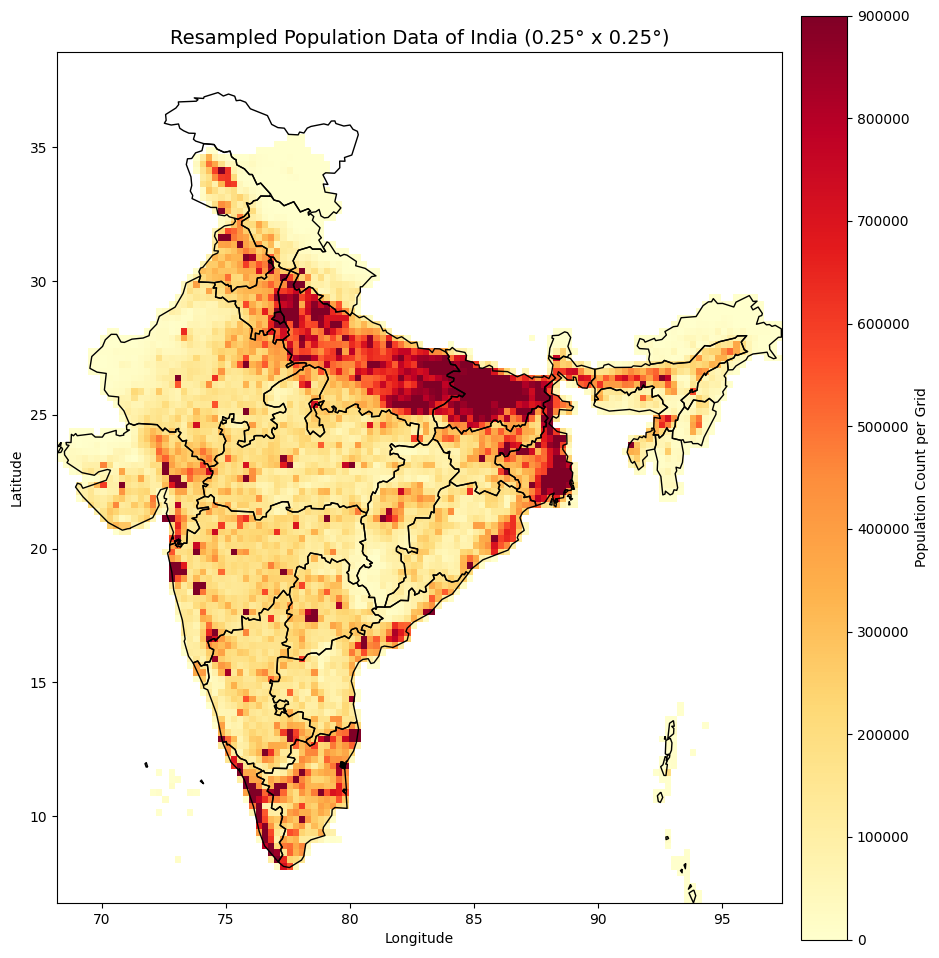

In [ ]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import geopandas as gpd
from rasterio.plot import show

# Define file paths
india_shapefile = r"/Users/shariqkhan/Developer/College Projects/Analysis of Rainfall on Urban Clusters and its Impacts(India)/Work/Data/Maps/india-polygon.shp"
resampled_population_file = r"/Users/shariqkhan/Developer/College Projects/Analysis of Rainfall on Urban Clusters and its Impacts(India)/Work/Data/Population Data/resample_qgis.tif"

# Load resampled population raster
with rasterio.open(resampled_population_file) as src:
    population_data = src.read(1)                                       # Read first band
    bounds = src.bounds                                                 # Get raster bounds
    transform = src.transform                                           # Get raster transformation
    crs = src.crs                                                       # Get CRS of raster

# Clip values to enhance hotspot visibility
population_data = np.clip(population_data, 0, 0.9e6)

# Load India shapefile
india = gpd.read_file(india_shapefile)
# india= world[world['NAME'] == 'India']

# Create plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot raster with correct bounds
show(population_data, transform=transform, cmap="YlOrRd", ax=ax, alpha=1, vmin=0, vmax=0.9e6)

# Overlay India shapefile (including PoK and Aksai Chin)
india.boundary.plot(ax=ax, color='black', linewidth=1, linestyle='solid')

# Add colorbar with adjusted range
cbar = plt.colorbar(ax.images[0], ax=ax, orientation="vertical", fraction=0.2, pad=0.02)
cbar.set_label("Population Count per Grid")

# Labels and Title
ax.set_title("Resampled Population Data of India (0.25° x 0.25°)", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Save and Show
# plt.savefig('Resampled Population Data of India.jpg', format='jpg', dpi=1200)
plt.show()


Now We'll identify the Urban Clusters (Areas with Population Count > 1000000)

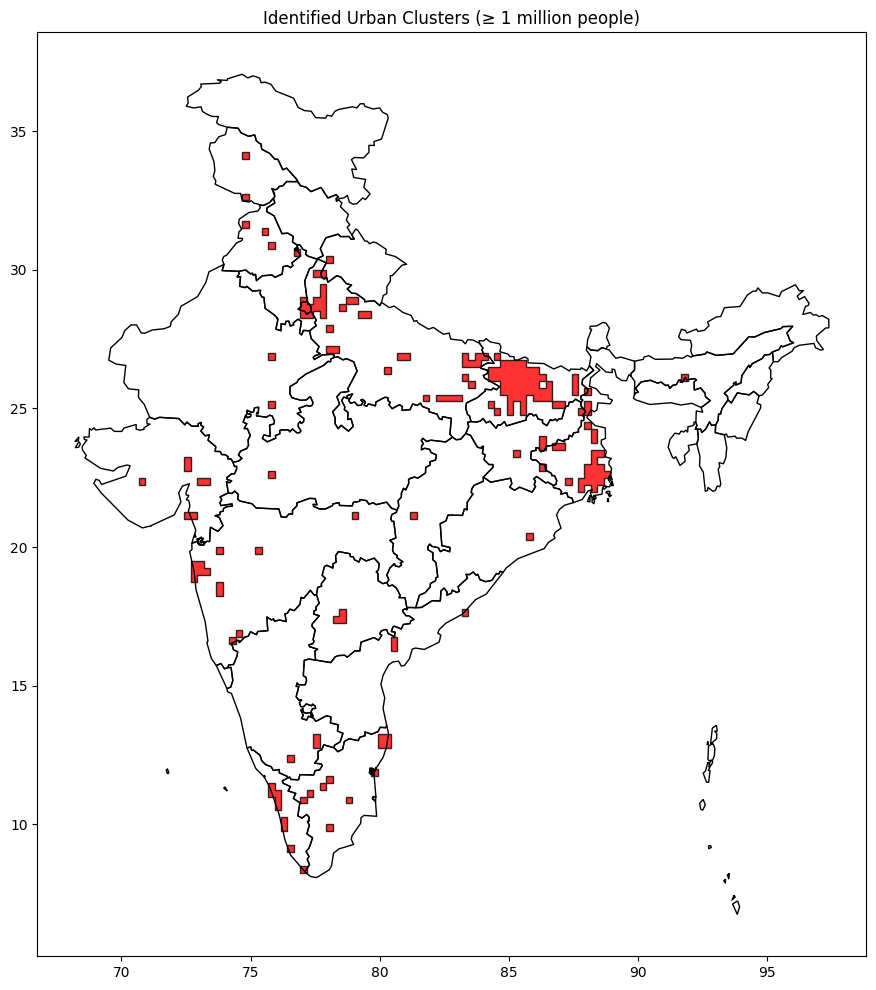

In [ ]:
# Import Libraries
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from rasterio.features import shapes
from shapely.geometry import shape
from rasterio.plot import show

# Define file paths
india_shapefile = r"/Users/shariqkhan/Developer/College Projects/Analysis of Rainfall on Urban Clusters and its Impacts(India)/Work/Data/India SHP File/India_world_full_kashmir.shp"
resampled_population_file = r"/Users/shariqkhan/Developer/College Projects/Analysis of Rainfall on Urban Clusters and its Impacts(India)/Work/Data/Population Data/resample_qgis.tif"

# Load Population Raster
with rasterio.open(resampled_population_file) as src:
    population_data = src.read(1) 
    bounds = src.bounds
    transform = src.transform 
    crs = src.crs  

# Thresholding: Mark urban clusters (Population >= 1 million)
urban_mask = population_data >= 1_000_000

# Convert raster to vector (polygonize urban regions)
urban_shapes = shapes(urban_mask.astype(np.uint8), transform=transform)
urban_polygons = [shape(geom) for geom, val in urban_shapes if val == 1]

# Create a GeoDataFrame for urban clusters
urban_gdf = gpd.GeoDataFrame(geometry=urban_polygons, crs=crs)

# Load India Shapefile
world = gpd.read_file(india_shapefile)

# Plot urban clusters over the Indian map
fig, ax = plt.subplots(figsize=(12, 12))

# Overlay India boundary (including PoK & Aksai Chin)
india.boundary.plot(ax=ax, color='black', linewidth=1, linestyle='solid')


# Plot Urban Clusters
urban_gdf.plot(ax=ax, color="red", alpha=0.8, edgecolor="black")

plt.title("Identified Urban Clusters (≥ 1 million people)")


# Save and Show
# plt.savefig('Urban Clusters India.jpg', format='jpg', dpi=1000)
plt.show()

# # Save the filtered GeoDataFrame to a new shapefile
# output_shapefile_path = r"/Users/shariqkhan/Developer/College Projects/Analysis of Rainfall on Urban Clusters and its Impacts(India)/Work/Data/urban_cluster.shp"
# urban_gdf.to_file(output_shapefile_path)


TIME SERIES ANALYSIS

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xarray as xr

# Path to the cleaned rainfall data (assuming a NetCDF file)

cleaned_data = r"/Users/shariqkhan/Developer/College Projects/Analysis of Rainfall on Urban Clusters and its Impacts(India)/Work/Data/Rainfall Data /Cleaned/cleaned_rainfall_data.nc"

# Load the data using xarray
rainfall_data = xr.open_dataset(cleaned_data)

print(rainfall_data.head)


<bound method Dataset.head of <xarray.Dataset> Size: 17MB
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 122)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 1kB 66.5 66.75 67.0 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 1kB 6.5 6.75 7.0 7.25 ... 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 976B 2023-06-01 2023-06-02 ... 2023-09-30
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 17MB ...>


In [28]:
import geopandas as gpd

# Update the path to your shapefile
shapefile_path = r"/Users/shariqkhan/Developer/College Projects/Analysis of Rainfall on Urban Clusters and its Impacts(India)/Work/Data/Urban Clusters/urban_cluster.shp"

# Load the shapefile
try:
    gdf = gpd.read_file(shapefile_path)
    print("Shapefile loaded successfully!")
    print(gdf.head())  # Display first few rows
except Exception as e:
    print("Error loading shapefile:", e)

# Convert to a projected CRS (UTM zone covering India, EPSG:32644 is for North India, adjust if needed)
projected_gdf = gdf.to_crs(epsg=32644)  # Use EPSG:32644 or another suitable projected CRS

# Compute centroids in the projected CRS, then reproject back to WGS 84 (lat/lon)
projected_gdf["centroid"] = projected_gdf.geometry.centroid
gdf["centroid"] = projected_gdf["centroid"].to_crs(epsg=4326)  # Convert back to WGS84 (EPSG:4326)

# Extract centroid coordinates
urban_cluster_coords = {
    f"Cluster_{i}": (row.centroid.y, row.centroid.x)  
    for i, row in gdf.iterrows()
}

# Print extracted coordinates
for cluster, (lat, lon) in list(urban_cluster_coords.items())[:10]:  # Print first 10 for preview
    print(f"{cluster}: Latitude {lat}, Longitude {lon}")



Shapefile loaded successfully!
   FID                                           geometry
0    0  POLYGON ((74.68079 34.25136, 74.93061 34.25136...
1    1  POLYGON ((74.68079 32.75149, 74.93061 32.75149...
2    2  POLYGON ((74.68079 31.75158, 74.93061 31.75158...
3    3  POLYGON ((75.43025 31.5016, 75.68007 31.5016, ...
4    4  POLYGON ((75.68007 31.00164, 75.9299 31.00164,...
Cluster_0: Latitude 34.12637238482831, Longitude 74.80569550161722
Cluster_1: Latitude 32.62650483361565, Longitude 74.80569490277024
Cluster_2: Latitude 31.626592972532098, Longitude 74.8056945110837
Cluster_3: Latitude 31.376615140566642, Longitude 75.55516062365994
Cluster_4: Latitude 30.87665919132173, Longitude 75.8049825320773
Cluster_5: Latitude 30.626681341733843, Longitude 76.80427077748752
Cluster_6: Latitude 30.376703473693407, Longitude 78.05338113880089
Cluster_7: Latitude 29.87692515808529, Longitude 77.67861807918518
Cluster_8: Latitude 28.877009080277023, Longitude 78.92773926900271
Cluster_9: Lati

Get Coordinates of Clusters and Save to CSV

In [ ]:
import geopandas as gpd
import pandas as pd

# Load the shapefile
urban_clusters_gdf = gpd.read_file(r"/Users/shariqkhan/Developer/College Projects/Analysis of Rainfall on Urban Clusters and its Impacts(India)/Work/Data/Urban Clusters/urban_cluster.shp")

# Ensure geometries are Points by getting centroids
urban_clusters_gdf["centroid"] = urban_clusters_gdf.geometry.centroid

# Extract latitude and longitude from the centroid
urban_clusters_gdf["Longitude"] = urban_clusters_gdf["centroid"].x
urban_clusters_gdf["Latitude"] = urban_clusters_gdf["centroid"].y

# Drop the centroid column (optional)
urban_clusters_gdf = urban_clusters_gdf.drop(columns=["centroid"])

# Change pandas display option to show all rows
pd.set_option('display.max_rows', None)

# # Save the results to a CSV file
# urban_clusters_gdf[["Latitude", "Longitude"]].to_csv("urban_clusters_coordinates.csv", index=False)

# Display the updated DataFrame
print(urban_clusters_gdf[["Latitude", "Longitude"]])


     Latitude  Longitude
0   34.126370  74.805698
1   32.626500  74.805698
2   31.626587  74.805698
3   31.376609  75.555164
4   30.876652  75.804985
5   30.626674  76.804273
6   30.376696  78.053383
7   29.876739  77.678650
8   28.876826  78.927760
9   28.626848  78.553027
10  28.731006  77.491284
11  28.376870  79.427404
12  27.876913  78.053383
13  27.126978  78.178294
14  26.877000  75.804985
15  26.877000  80.926335
16  26.877000  84.548753
17  26.752011  83.632739
18  26.377044  80.301780
19  26.127065  83.299644
20  26.127065  91.793589
21  25.877087  83.549465
22  25.877087  87.546616
23  25.627109  88.046260
24  25.377131  81.800712
25  25.377131  82.675089
26  25.127152  75.804985
27  25.127152  84.298931
28  25.127152  86.922062
29  25.893390  85.439423
30  24.877174  84.548753
31  24.960500  87.962986
32  24.377217  88.046260
33  24.002250  88.296082
34  23.752272  86.297507
35  23.627283  86.922062
36  23.377304  85.298219
37  23.002337  72.557300
38  22.877348  86.297507


/var/folders/bw/15vmwks95gv6gj821314wfzw0000gn/T/ipykernel_1037/737494584.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  urban_clusters_gdf["centroid"] = urban_clusters_gdf.geometry.centroid


Combined Time-Series Analysis

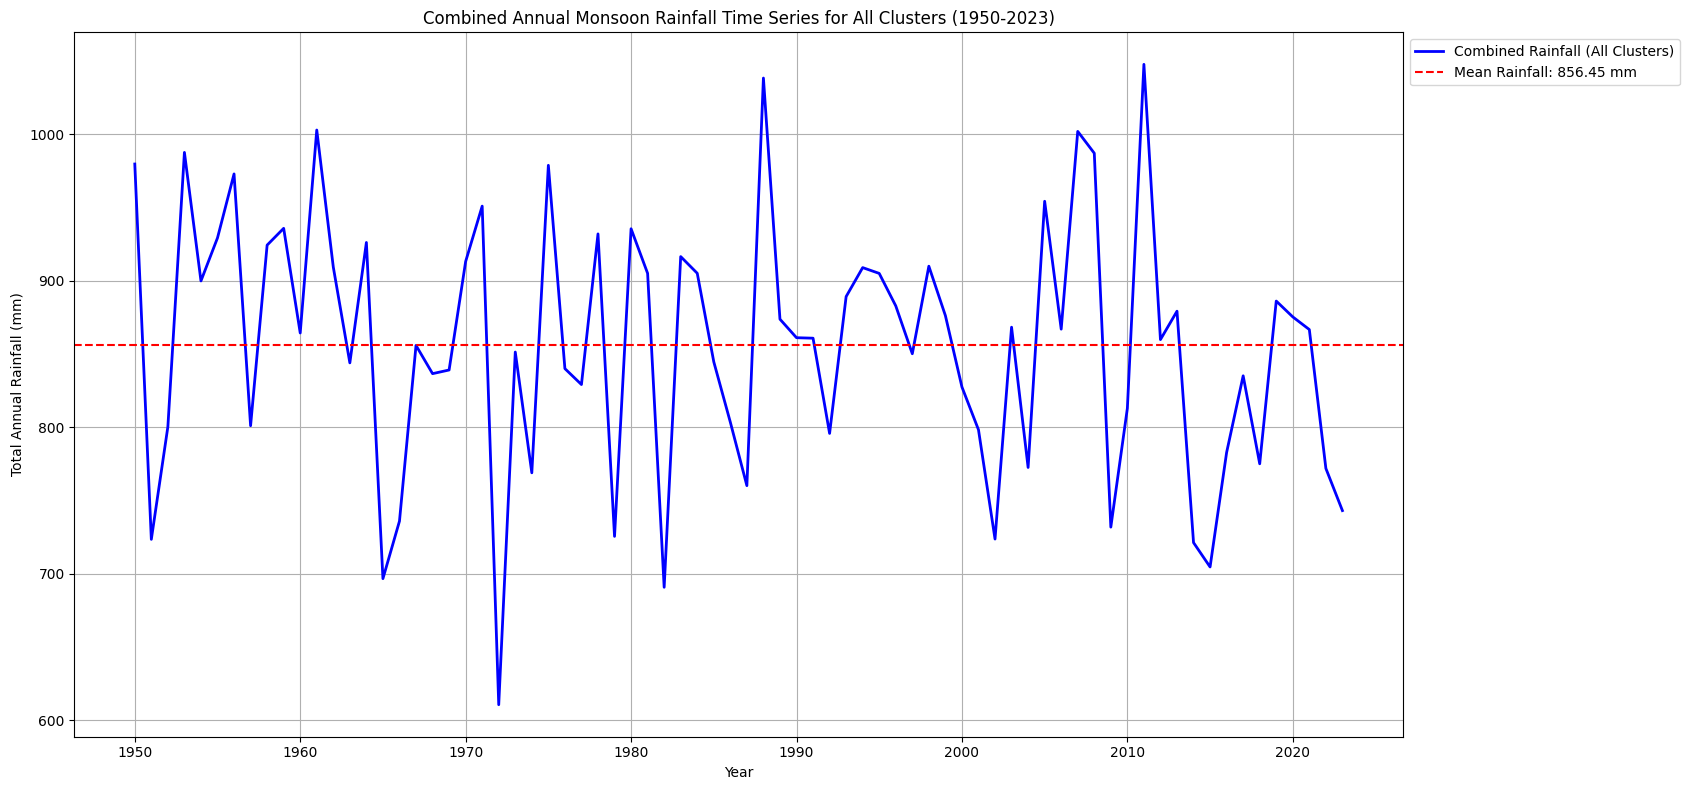

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

# Load the rainfall data (assuming a NetCDF file with monsoon data from 1950-2023)
rainfall_data_file = r"/Users/shariqkhan/Developer/College Projects/Analysis of Rainfall on Urban Clusters and its Impacts(India)/Work/Data/Rainfall Data /Cleaned/cleaned_data.nc"
rainfall_data = xr.open_dataset(rainfall_data_file)

# Load the urban cluster coordinates from the CSV file
coords_file = r"/Users/shariqkhan/Developer/College Projects/Analysis of Rainfall on Urban Clusters and its Impacts(India)/Work/Data/urban_clusters_coordinates.csv"
coords_df = pd.read_csv(coords_file)

# Initialize an empty list to store the annual rainfall for all cities
all_cities_annual_rainfall = []

# Loop through each row in the DataFrame to extract and aggregate the rainfall data
for index, row in coords_df.iterrows():
    LATITUDE, LONGITUDE = row['Latitude'], row['Longitude']
    
    # Extract the rainfall data for the city (nearest grid point)
    city_rainfall = rainfall_data['RAINFALL'].sel(LATITUDE=LATITUDE, LONGITUDE=LONGITUDE, method='nearest')
    
    # Resample the data to get annual total rainfall
    city_rainfall_annual = city_rainfall.resample(TIME='YE').sum()  
    
    # Append the city's annual rainfall data to the list
    all_cities_annual_rainfall.append(city_rainfall_annual)

# Combine the data for all cities by averaging across them
combined_annual_rainfall = np.mean(np.array([rainfall.values for rainfall in all_cities_annual_rainfall]), axis=0)

# Calculate the mean of the combined rainfall time series
mean_combined_rainfall = np.mean(combined_annual_rainfall)

# Create a plot for the combined time series
plt.figure(figsize=(17, 8))

# Plot the combined annual rainfall time series
plt.plot(all_cities_annual_rainfall[0].TIME.dt.year, combined_annual_rainfall, label='Combined Rainfall (All Clusters)', color='b', linewidth=2)

# Plot the mean line
plt.axhline(y=mean_combined_rainfall, color='r', linestyle='--', label=f'Mean Rainfall: {mean_combined_rainfall:.2f} mm')

# Title and labels
plt.title('Combined Annual Monsoon Rainfall Time Series for All Clusters (1950-2023)')
plt.xlabel('Year')
plt.ylabel('Total Annual Rainfall (mm)')
plt.grid(True)

# Display the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout and display the plot
plt.tight_layout()

# # Save the plot to a file (optional)
# plt.savefig('Combined Annual Monsoon Rainfall Trend for All Clusters (1950-2023).jpg', format='jpg', dpi=1200)

plt.show()


EXTREME EVENT ANALYSIS USING Z-TEST

Extreme events for Combined Rainfall (All Clusters):
Flood Years:
Year: 1950, Rainfall: 979.81 mm, Deviation: 123.37 mm
Year: 1953, Rainfall: 987.74 mm, Deviation: 131.30 mm
Year: 1956, Rainfall: 973.04 mm, Deviation: 116.60 mm
Year: 1961, Rainfall: 1003.03 mm, Deviation: 146.58 mm
Year: 1971, Rainfall: 951.05 mm, Deviation: 94.61 mm
Year: 1975, Rainfall: 978.93 mm, Deviation: 122.48 mm
Year: 1988, Rainfall: 1038.53 mm, Deviation: 182.08 mm
Year: 2005, Rainfall: 954.37 mm, Deviation: 97.92 mm
Year: 2007, Rainfall: 1002.09 mm, Deviation: 145.65 mm
Year: 2008, Rainfall: 987.19 mm, Deviation: 130.75 mm
Year: 2011, Rainfall: 1047.88 mm, Deviation: 191.44 mm

Drought Years:
Year: 1951, Rainfall: 723.46 mm, Deviation: -132.98 mm
Year: 1965, Rainfall: 696.62 mm, Deviation: -159.83 mm
Year: 1966, Rainfall: 735.91 mm, Deviation: -120.54 mm
Year: 1972, Rainfall: 610.52 mm, Deviation: -245.92 mm
Year: 1979, Rainfall: 725.49 mm, Deviation: -130.95 mm
Year: 1982, Rainfall: 690.73 mm, Deviation: -16

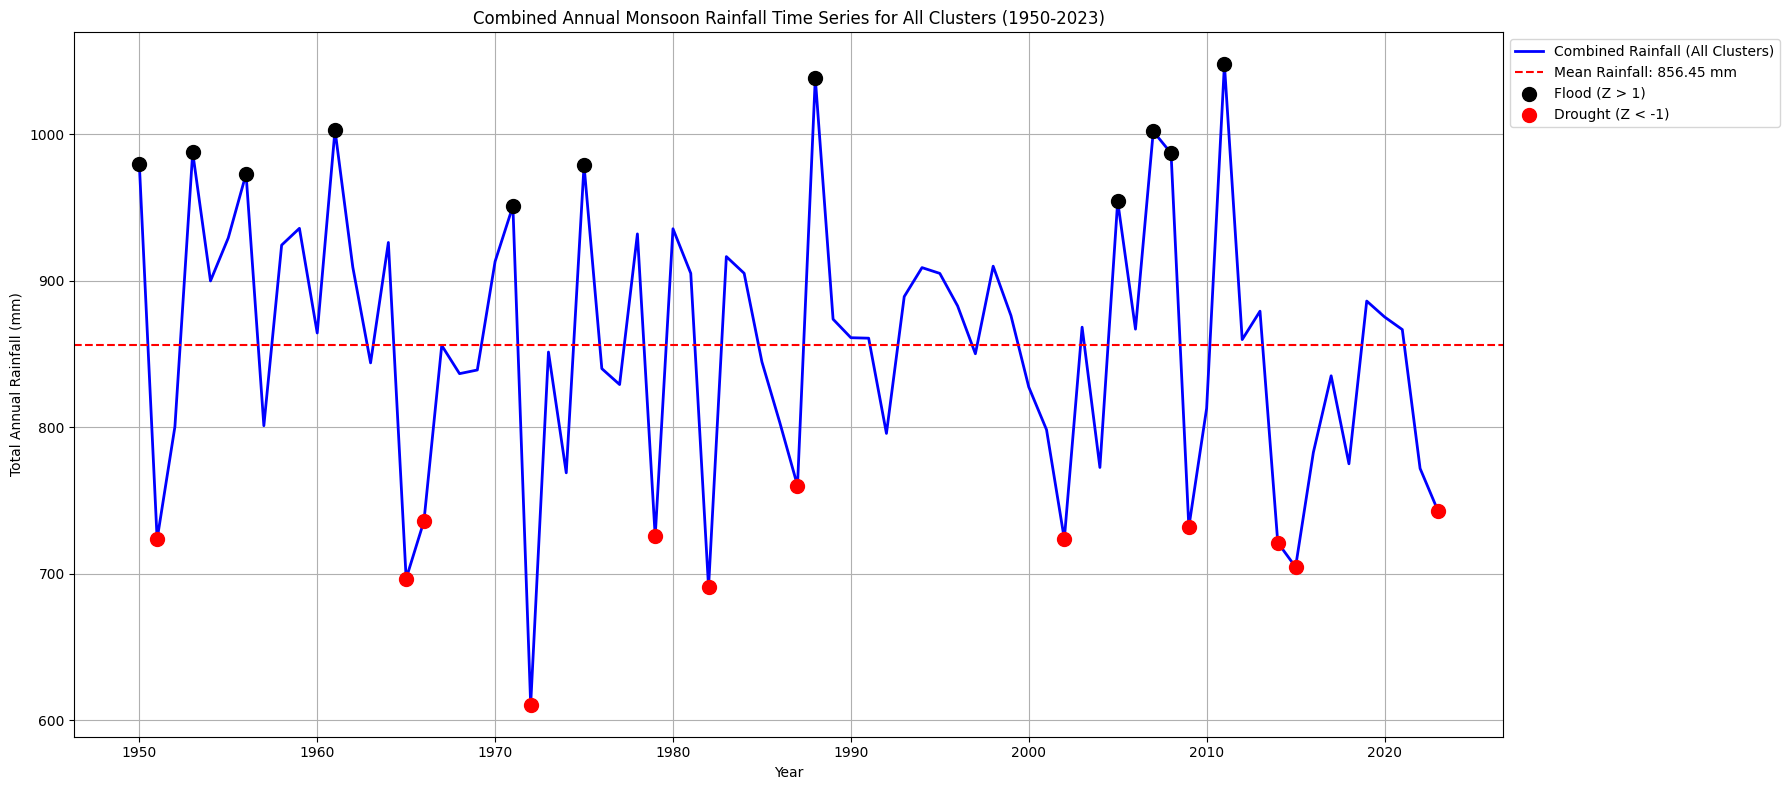

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from scipy import stats

# Load the rainfall data (assuming a NetCDF file with monsoon data from 1950-2023)
rainfall_data_file = r"/Users/shariqkhan/Developer/College Projects/Analysis of Rainfall on Urban Clusters and its Impacts(India)/Work/Data/Rainfall Data /Cleaned/cleaned_data.nc"
rainfall_data = xr.open_dataset(rainfall_data_file)

# Load the urban cluster coordinates from the CSV file
coords_file = r"/Users/shariqkhan/Developer/College Projects/Analysis of Rainfall on Urban Clusters and its Impacts(India)/Work/Data/urban_clusters_coordinates.csv"
coords_df = pd.read_csv(coords_file)

# Initialize an empty list to store the annual rainfall for all cities
all_cities_annual_rainfall = []

# Loop through each row in the DataFrame to extract and aggregate the rainfall data
for index, row in coords_df.iterrows():
    LATITUDE, LONGITUDE = row['Latitude'], row['Longitude']
    
    # Extract the rainfall data for the city (nearest grid point)
    city_rainfall = rainfall_data['RAINFALL'].sel(LATITUDE=LATITUDE, LONGITUDE=LONGITUDE, method='nearest')
    
    # Resample the data to get annual total rainfall
    city_rainfall_annual = city_rainfall.resample(TIME='YE').sum()  
    
    # Append the city's annual rainfall data to the list
    all_cities_annual_rainfall.append(city_rainfall_annual)

# Combine the data for all cities by averaging across them
combined_annual_rainfall = np.mean(np.array([rainfall.values for rainfall in all_cities_annual_rainfall]), axis=0)

# Calculate the mean and standard deviation of the combined rainfall data
mean_combined_rainfall = np.mean(combined_annual_rainfall)
std_combined_rainfall = np.std(combined_annual_rainfall)

# Perform the Z-test for each year (for simplicity, we assume population mean and std for each year)
z_scores = (combined_annual_rainfall - mean_combined_rainfall) / std_combined_rainfall

# Define Z-score thresholds for extreme events
floods = np.where(z_scores > 1)[0]  # Flood years (Z > 1)
droughts = np.where(z_scores < -1)[0]  # Drought years (Z < -1)

# Plot the combined time series with the mean line
plt.figure(figsize=(18, 8))
plt.plot(all_cities_annual_rainfall[0].TIME.dt.year, combined_annual_rainfall, label='Combined Rainfall (All Clusters)', color='blue', linewidth=2)
plt.axhline(y=mean_combined_rainfall, color='r', linestyle='--', label=f'Mean Rainfall: {mean_combined_rainfall:.2f} mm')

# Mark extreme events
plt.scatter(all_cities_annual_rainfall[0].TIME.dt.year[floods], combined_annual_rainfall[floods], color='black', label='Flood (Z > 1)', zorder=20, s=100)
plt.scatter(all_cities_annual_rainfall[0].TIME.dt.year[droughts], combined_annual_rainfall[droughts], color='red', label='Drought (Z < -1)', zorder=20, s=100)

# Title and labels
plt.title('Combined Annual Monsoon Rainfall Time Series for All Clusters (1950-2023)')
plt.xlabel('Year')
plt.ylabel('Total Annual Rainfall (mm)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()

# Print the years with extreme events along with rainfall values and deviation from mean
print("Extreme events for Combined Rainfall (All Clusters):")

# Flood Years
flood_years = all_cities_annual_rainfall[0].TIME.dt.year[floods].values
flood_rainfall = combined_annual_rainfall[floods]
flood_deviation = z_scores[floods] * std_combined_rainfall

print("Flood Years:")
for year, rain, dev in zip(flood_years, flood_rainfall, flood_deviation):
    print(f"Year: {year}, Rainfall: {rain:.2f} mm, Deviation: {dev:.2f} mm")

# Drought Years
drought_years = all_cities_annual_rainfall[0].TIME.dt.year[droughts].values
drought_rainfall = combined_annual_rainfall[droughts]
drought_deviation = z_scores[droughts] * std_combined_rainfall

print("\nDrought Years:")
for year, rain, dev in zip(drought_years, drought_rainfall, drought_deviation):
    print(f"Year: {year}, Rainfall: {rain:.2f} mm, Deviation: {dev:.2f} mm")

# # Save the plot
# plt.savefig('Time Series for Urban Clusters for 1950-2023.jpg', format='jpg', dpi = 1200)

plt.show()



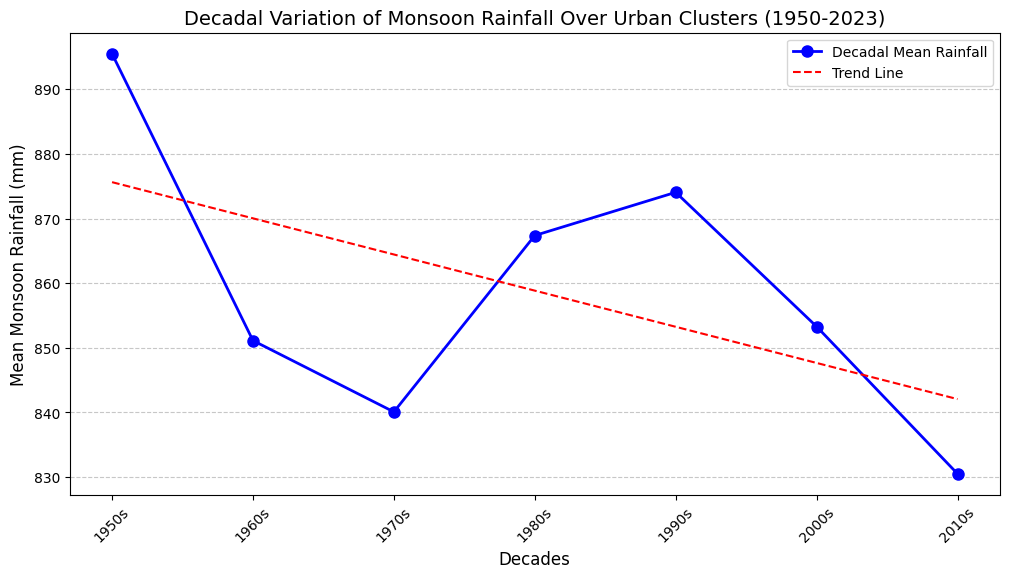

🔹 Decadal Average Rainfall over Urban Clusters (mm):

1950–1959: 895.51 mm
1960–1969: 851.13 mm
1970–1979: 840.08 mm
1980–1989: 867.39 mm
1990–1999: 874.07 mm
2000–2009: 853.29 mm
2010–2019: 830.51 mm


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

# Load the rainfall data (NetCDF with monsoon data from 1950-2023)
rainfall_data_file = r"/Users/shariqkhan/Developer/College Projects/Analysis of Rainfall on Urban Clusters and its Impacts(India)/Work/Data/Rainfall Data /Cleaned/cleaned_data.nc"
rainfall_data = xr.open_dataset(rainfall_data_file)

# Load the urban cluster coordinates
coords_file = r"/Users/shariqkhan/Developer/College Projects/Analysis of Rainfall on Urban Clusters and its Impacts(India)/Work/Data/urban_clusters_coordinates.csv"
coords_df = pd.read_csv(coords_file)

# Initialize a list to store annual rainfall data for all cities
all_cities_annual_rainfall = []

# Extract and aggregate rainfall for each urban cluster
for _, row in coords_df.iterrows():
    LATITUDE, LONGITUDE = row['Latitude'], row['Longitude']
    
    # Select rainfall data for the city (nearest grid point)
    city_rainfall = rainfall_data['RAINFALL'].sel(LATITUDE=LATITUDE, LONGITUDE=LONGITUDE, method='nearest')
    
    # Compute annual total rainfall
    city_rainfall_annual = city_rainfall.resample(TIME='YE').sum()
    
    # Append to list
    all_cities_annual_rainfall.append(city_rainfall_annual)

# Combine the data for all cities (average across all urban clusters)
combined_annual_rainfall = np.mean(np.array([rainfall.values for rainfall in all_cities_annual_rainfall]), axis=0)

# Extract years
years = all_cities_annual_rainfall[0].TIME.dt.year.values

# **🔹 Step 1: Group Rainfall Data by Decade**
decades = np.arange(1950, 2030, 10)  # Decadal bins (1950-1959, 1960-1969, ...)
decadal_means = []

for i in range(len(decades) - 1):
    start_year, end_year = decades[i], decades[i + 1] - 1
    mask = (years >= start_year) & (years <= end_year)
    decadal_means.append(np.mean(combined_annual_rainfall[mask]))


# **🔹 Step 2: Plot Decadal Rainfall Variations (Line Plot)**
plt.figure(figsize=(12, 6))

plt.plot(decades[:-1], decadal_means, marker='o', linestyle='-', color='b', linewidth=2, markersize=8, label="Decadal Mean Rainfall")

# Labels and title
plt.xlabel("Decades", fontsize=12)
plt.ylabel("Mean Monsoon Rainfall (mm)", fontsize=12)
plt.title("Decadal Variation of Monsoon Rainfall Over Urban Clusters (1950-2023)", fontsize=14)
plt.xticks(decades[:-1], labels=[f"{d}s" for d in decades[:-1]], rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add a trend line
z = np.polyfit(decades[:-1], decadal_means, 1)  # Fit a linear trend
p = np.poly1d(z)
plt.plot(decades[:-1], p(decades[:-1]), "r--", label="Trend Line")

# Show legend
plt.legend()


# # # Save the plot
# plt.savefig('Decadal Variation of Monsoon Rainfall Over Urban Clusters (1950-2023).jpg', format='jpg', dpi = 1200)

# Display plot
plt.show()

# Print decadal average rainfall values
print("🔹 Decadal Average Rainfall over Urban Clusters (mm):\n")
for i in range(len(decades) - 1):
    print(f"{decades[i]}–{decades[i+1] - 1}: {decadal_means[i]:.2f} mm")

